In [1]:
# initial imports
import io
import numpy as np
import joblib
from sklearn.metrics import silhouette_score   

# Text Representation

In [3]:
text_tfidf = joblib.load('processed_tfidf.save')

## SVD

In [15]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=200, n_iter=100)

#Tf-Idf
tfidf = svd.fit_transform(text_tfidf)

KeyboardInterrupt: 

In [7]:
joblib.dump(tfidf,'./tfidf.save')

['./d2v.save']

In [5]:
tfidf = joblib.load("./tfidf.save")

In [66]:
from sklearn.decomposition import PCA
import seaborn as sns

def plot_clustering(points, clusters):
    pca = PCA(2)
    data = pca.fit_transform(points)
    print(data.shape)
    df = pd.DataFrame(data, columns=['x','y'])
    df['cluster'] = clusters
    sns.scatterplot(data=df, x="x", y="y" , hue="cluster")

# Text Clustering

## DBSCAN

In [7]:
from sklearn.cluster import DBSCAN

In [55]:
clustering = DBSCAN(min_samples=10, eps=0.3)
clustering = clustering.fit_predict(tfidf)

filtered_data = []
filtered_labels = []
for index in (range(0, len(clustering))):
    label = clustering[index]
    if label != -1:
        filtered_data.append(tfidf[index])
        filtered_labels.append(label)

100%|███████████████████████████████████████████████████████████████████████| 99881/99881 [00:00<00:00, 1972369.48it/s]


In [68]:
print(silhouette_score(filtered_data, filtered_labels))

0.20387435850410174


In [13]:
joblib.dump(clustering, './tfidf_dbscan.save')

['./tfidf_dbscan.save']

In [72]:
#Numero dei Clusters
len(np.unique(clustering))-1

118

(8832, 2)


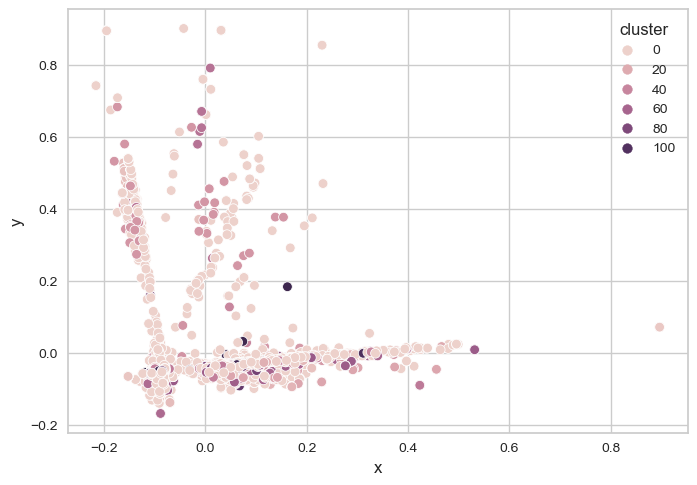

In [69]:
plot_clustering(filtered_data, filtered_labels)

## K-means

In [61]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

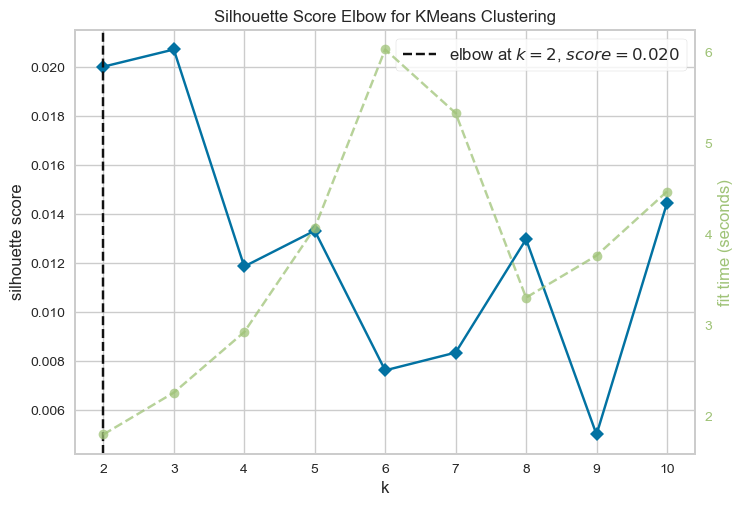

In [76]:
model = KMeans(random_state=123)
visualizer = kelbow_visualizer(model, tfidf , k=(2,11), metric='silhouette')

In [62]:
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=123)
elbow_labels_pred = kmeans.fit_predict(tfidf)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



(99881, 2)


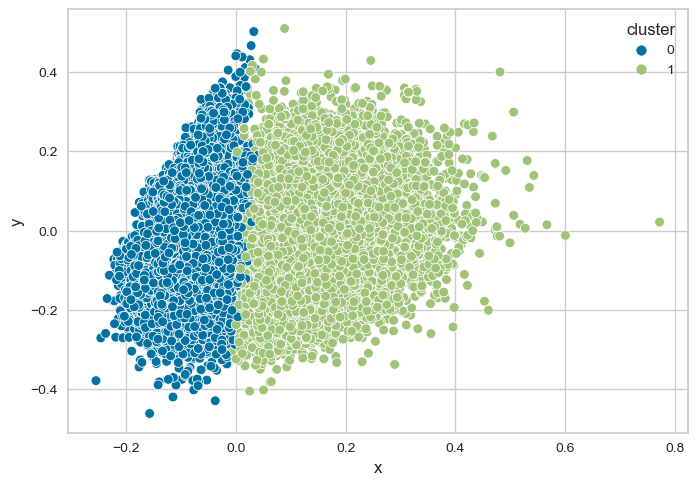

In [67]:
plot_clustering(tfidf, elbow_labels_pred)